In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.nddata import Cutout2D
from scipy import ndimage
from photutils import aperture
import numpy as np
from tqdm import tqdm
from astropy import visualization
from matplotlib.colors import LogNorm
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator

Ring/Gap Mean Contrast:  [6.39374768]
(350, 350)


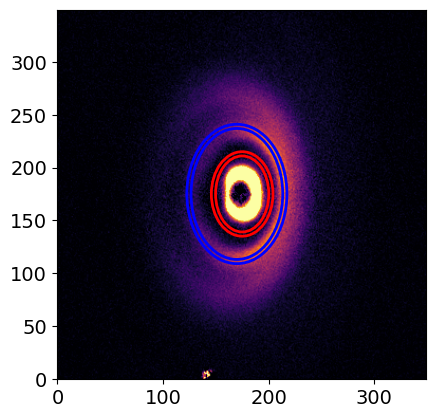

In [36]:
TYC = fits.open('fits/TYC_5709-354-1_2025-03-21_Q_phi.fits')[0].data


TYC = np.array(Cutout2D(TYC,(len(TYC[0])/2,len(TYC)/2),(350,350)).data)

plt.imshow(TYC,origin='lower',cmap='inferno',vmin=0,vmax=70#extent=[-3,3,-3,3],#vmin=0
          )

positions = [(175, 175)]
m=36
ap1 = aperture.EllipticalAnnulus(positions, a_in=1*m,b_in=0.7*m,a_out=1*m+4,b_out=0.7*m+4,theta=90*np.pi/180)

positions = [(170, 175)]
m=62
ap2 = aperture.EllipticalAnnulus(positions, a_in=1*m,b_in=0.7*m,a_out=1*m+4,b_out=0.7*m+4,theta=90*np.pi/180)

print('Ring/Gap Mean Contrast: ',aperture.ApertureStats(TYC, ap2).mean/aperture.ApertureStats(TYC, ap1).mean)


ap_patches = ap1.plot(color='red', lw=2,
                           label='Photometry aperture')

ap_patches = ap2.plot(color='blue', lw=2,
                           label='Photometry aperture')

print(TYC.shape)

Ring/Gap Mean Contrast:  [7.00260905]
(500, 500)


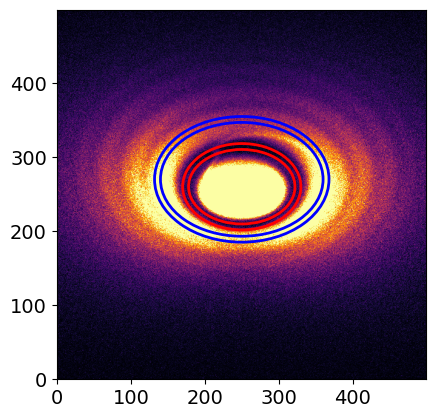

In [4]:
DongModel = fits.open('fits/e_2H_45.0_0.0_PF_img.fits')[0].data


DongModel = np.array(Cutout2D(DongModel,(len(DongModel[0])/2,len(DongModel)/2),(500,500)).data)

plt.imshow(DongModel,origin='lower',cmap='inferno',vmax=200#extent=[-3,3,-3,3],
          )

positions = [(250, 260)]
m=72
ap1 = aperture.EllipticalAnnulus(positions, a_in=1*m,b_in=0.7*m,a_out=1*m+8,b_out=0.7*m+8)
positions = [(250, 270)]
m=110
ap2 = aperture.EllipticalAnnulus(positions, a_in=1*m,b_in=0.7*m,a_out=1*m+8,b_out=0.7*m+8)
print('Ring/Gap Mean Contrast: ',aperture.ApertureStats(DongModel, ap2).mean/aperture.ApertureStats(DongModel, ap1).mean)
#ap = aperture.CircularAperture(positions,r=4)

ap_patches = ap1.plot(color='red', lw=2,
                           label='Photometry aperture')
ap_patches = ap2.plot(color='blue', lw=2,
                           label='Photometry aperture')
print(DongModel.shape)


In [5]:
'''
positions = [(170, 175)]
fluxes = []
index = []
for m in tqdm(range(1000,120000,1000)):
    ap = aperture.EllipticalAnnulus(positions, a_in=1*(m/1000),b_in=0.7*(m/1000),a_out=1*(m/1000)+0.1,b_out=0.7*(m/1000)+0.1,theta=90*np.pi/180)
    
    Flux = aperture.ApertureStats(TYC, ap).mean

    rm=160
    refap = aperture.EllipticalAnnulus(positions, a_in=1*rm,b_in=0.7*rm,a_out=1*rm+1,b_out=0.7*rm+1,theta=90*np.pi/180)
    refFlux = aperture.ApertureStats(TYC, refap).sum
    index.append((1.64*m/1000)/55)
    fluxes.append(Flux/refFlux)

mpositions = [(250, 260)]
mfluxes = []
mindex = []
for m in tqdm(range(3000,200000,500)):
    ap = aperture.EllipticalAnnulus(positions, a_in=1*(m/1000),b_in=0.7*(m/1000),a_out=1*(m/1000)+1,b_out=0.7*(m/1000)+1)

    Flux = aperture.ApertureStats(DongModel, ap).mean

    rm=240
    refap = aperture.EllipticalAnnulus(positions, a_in=1*rm,b_in=0.7*rm,a_out=1*rm+1,b_out=0.7*rm+1)
    refFlux = aperture.ApertureStats(DongModel, refap).sum
    mindex.append((0.4*m/1000)/30)
    mfluxes.append(Flux/refFlux)


plt.plot(index,fluxes,color='black')
plt.plot(mindex,mfluxes,color='black',linestyle='dotted')
'''

"\npositions = [(170, 175)]\nfluxes = []\nindex = []\nfor m in tqdm(range(1000,120000,1000)):\n    ap = aperture.EllipticalAnnulus(positions, a_in=1*(m/1000),b_in=0.7*(m/1000),a_out=1*(m/1000)+0.1,b_out=0.7*(m/1000)+0.1,theta=90*np.pi/180)\n\n    Flux = aperture.ApertureStats(TYC, ap).mean\n\n    rm=160\n    refap = aperture.EllipticalAnnulus(positions, a_in=1*rm,b_in=0.7*rm,a_out=1*rm+1,b_out=0.7*rm+1,theta=90*np.pi/180)\n    refFlux = aperture.ApertureStats(TYC, refap).sum\n    index.append((1.64*m/1000)/55)\n    fluxes.append(Flux/refFlux)\n\nmpositions = [(250, 260)]\nmfluxes = []\nmindex = []\nfor m in tqdm(range(3000,200000,500)):\n    ap = aperture.EllipticalAnnulus(positions, a_in=1*(m/1000),b_in=0.7*(m/1000),a_out=1*(m/1000)+1,b_out=0.7*(m/1000)+1)\n\n    Flux = aperture.ApertureStats(DongModel, ap).mean\n\n    rm=240\n    refap = aperture.EllipticalAnnulus(positions, a_in=1*rm,b_in=0.7*rm,a_out=1*rm+1,b_out=0.7*rm+1)\n    refFlux = aperture.ApertureStats(DongModel, refap).sum

100%|███████████████████████████████████████| 500/500 [00:00<00:00, 2075.19it/s]


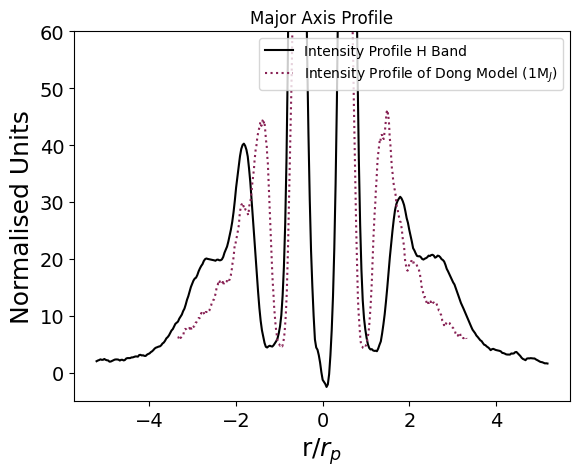

In [7]:
import matplotlib as mpl
mpl.rcParams['axes.labelsize'] = 18       # x/y axis labels
mpl.rcParams['xtick.labelsize'] = 14      # x-tick labels
mpl.rcParams['ytick.labelsize'] = 14 

positions = [(170, 175)]
fluxes = []
index = []
for m in tqdm(range(-175,175)):
    ap = aperture.CircularAperture(r=4,positions=(175,175+m))
    
    Flux = aperture.ApertureStats(TYC, ap).mean

    rm=160
    refap = aperture.EllipticalAnnulus(positions, a_in=1*rm,b_in=0.7*rm,a_out=1*rm+1,b_out=0.7*rm+1,theta=90*np.pi/180)
    #refFlux = aperture.ApertureStats(TYC, refap).sum
    
    index.append((1.64*m)/55)
    fluxes.append(Flux#/refFlux
                 )

mpositions = [(250, 260)]
mfluxes = []
mindex = []
for m in tqdm(range(-250,250)):
    ap = aperture.CircularAperture(r=4,positions=(250+m,250))
    
    Flux = aperture.ApertureStats(DongModel, ap).mean

    rm=240
    refap = aperture.EllipticalAnnulus(positions, a_in=1*rm,b_in=0.7*rm,a_out=1*rm+1,b_out=0.7*rm+1)
    #refFlux = aperture.ApertureStats(DongModel, refap).sum
    
    mindex.append((0.4*m)/30)
    mfluxes.append(Flux/7#/refFlux
                      )

plt.plot(index,fluxes,color='black')
plt.plot(mindex,mfluxes,color='#882255',linestyle='dotted')
plt.ylim(-5,60)
#plt.xlim(0,5)
plt.xlabel('r/$r_p$')
plt.ylabel('Normalised Units')
plt.legend(['Intensity Profile H Band','Intensity Profile of Dong Model (1M$_J$)'])
plt.title('Major Axis Profile')
plt.savefig('MajorAxis.pdf')

100%|███████████████████████████████████████| 500/500 [00:00<00:00, 1289.36it/s]


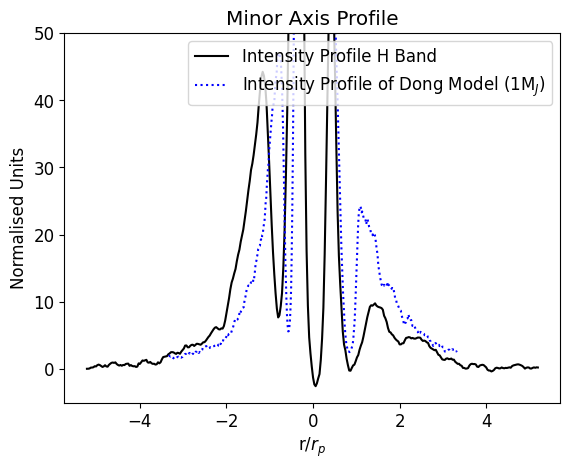

In [48]:
'''

positions = [(170, 175)]
fluxes45 = []
index45 = []
for m in tqdm(range(-175,175)):
    ap = aperture.CircularAperture(r=4,positions=(175-m,175))
    
    Flux = aperture.ApertureStats(TYC, ap).mean

    rm=160
    refap = aperture.EllipticalAnnulus(positions, a_in=1*rm,b_in=0.7*rm,a_out=1*rm+1,b_out=0.7*rm+1,theta=90*np.pi/180)
    #refFlux = aperture.ApertureStats(TYC, refap).sum
    
    index45.append((1.64*m)/55)
    fluxes45.append(Flux#/refFlux
                 )

mpositions = [(250, 260)]
mfluxes45 = []
mindex45 = []
for m in tqdm(range(-250,250)):
    ap = aperture.CircularAperture(r=4,positions=(250,250+m))
    
    Flux = aperture.ApertureStats(DongModel, ap).mean

    rm=240
    refap = aperture.EllipticalAnnulus(positions, a_in=1*rm,b_in=0.7*rm,a_out=1*rm+1,b_out=0.7*rm+1)
    #refFlux = aperture.ApertureStats(DongModel, refap).sum
    mindex45.append((0.4*m)/30)
    mfluxes45.append(Flux/4#/refFlux
                      )


plt.plot(index45,fluxes45,color='black')
plt.plot(mindex45,mfluxes45,color='blue',linestyle='dotted')
plt.ylim(-5,50)
#plt.xlim(-5,0)
plt.xlabel('r/$r_p$')
plt.ylabel('Normalised Units')
plt.legend(['Intensity Profile H Band','Intensity Profile of Dong Model (1M$_J$)'])
plt.title('Minor Axis Profile')
plt.savefig('MinorAxis.pdf')

In [96]:
'''
tick_font_size=12

#fig, ax = plt.subplots(1,2,figsize=(16,9))
majorLocator   = MultipleLocator(0.5)
minorLocator   = MultipleLocator(0.1)    
    
fig = plt.figure()
fig.subplots_adjust(hspace=0, wspace=0)   
    
ax = fig.add_subplot(231)        
ax.tick_params(axis='x', labelsize=tick_font_size)
ax.tick_params(axis='y', labelsize=tick_font_size)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_minor_locator(minorLocator)  
ax.yaxis.set_major_locator(majorLocator)
ax.yaxis.set_minor_locator(minorLocator)
ax.tick_params(axis='x', colors='white',direction="in")  
ax.tick_params(which="minor", axis='x', colors='white',direction="in")
ax.tick_params(which="minor", axis='y', colors='white',direction="in") 
ax.tick_params(axis='y', colors='white',direction="in") 
ax.xaxis.set_tick_params(width=1, length=6)
ax.xaxis.set_tick_params(which="minor", width=1, length=4)    
ax.yaxis.set_tick_params(which="minor", width=1, length=4)    
ax.yaxis.set_tick_params(width=1, length=6)
    
#ax.set_xlim([x_min,x_max])    
#ax.set_ylim([y_min,y_max])    
    
#ax7.axes.yaxis.set_ticklabels([])
ax.axes.xaxis.set_ticklabels([])
#ax2.yaxis.tick_right()      
#ax7.xaxis.tick_top() 
DongModel = fits.open('fits/e_2H_45.0_0.0_PF_img.fits')[0].data

DongModel = np.array(Cutout2D(DongModel,(len(DongModel[0])/2,len(DongModel)/2),(700,700)).data)

TYC = fits.open('fits/TYC_5709-354-1_2025-03-21_Q_phi.fits')[0].data


TYC = np.array(Cutout2D(TYC,(len(TYC[0])/2,len(TYC)/2),(270,270)).data)



ax[0].imshow(ndimage.rotate(TYC,90),cmap='inferno',origin='lower',
             norm=LogNorm(clip=True,vmin=1,vmax=600),extent=[-1.6*len(TYC)/2,
                                                             1.6*len(TYC)/2,
                                                            -1.6*len(TYC)/2,
                                                             1.6*len(TYC)/2]
            )
ax[1].imshow(DongModel,origin='lower',cmap='inferno',#vmin=0,
             #vmax=500,
             norm=LogNorm(vmin=1,vmax=10000),extent=[-0.4*len(DongModel)/2,
                                                             0.4*len(DongModel)/2,
                                                            -0.4*len(DongModel)/2,
                                                             0.4*len(DongModel)/2])

#plt.savefig('WISPITData-Model-Comparison.pdf')

SyntaxError: incomplete input (1447952818.py, line 1)

In [97]:
'''
TYCDeproj = np.array(fits.open('fits/TYCDeproj42.fits')[0].data)




plt.imshow(TYCDeproj,origin='lower',cmap='inferno',vmin=0,vmax=70#extent=[-3,3,-3,3],#vmin=0
           
          )

positions = [(175, 175)]
m=160
ap = aperture.EllipticalAnnulus(positions, a_in=1*m,b_in=0.7*m,a_out=1*m+1,b_out=0.7*m+1,theta=90*np.pi/180)



#ap_patches = ap.plot(color='white', lw=2,
#                           label='Photometry aperture')
print(TYCDeproj.shape)

SyntaxError: incomplete input (777377955.py, line 1)

In [98]:
'''
DongModel0 = fits.open('fits/e_2H_0.0_0.0_PF_img.fits')[0].data


DongModel0 = np.array(Cutout2D(DongModel0,(len(DongModel0[0])/2,len(DongModel0)/2),(700,700)).data)

plt.imshow(DongModel0,origin='lower',cmap='inferno',vmax=200#extent=[-3,3,-3,3],
          )
print(DongModel0.shape)


SyntaxError: incomplete input (1317528548.py, line 1)

In [99]:
'''
positions = [(175, 175)]
fluxes = []
index = []
for m in tqdm(range(-175,175)):
    ap = aperture.CircularAperture(r=4,positions=(175+m,175))
    
    Flux = aperture.ApertureStats(TYCDeproj, ap).mean

    rm=160
    refap = aperture.EllipticalAnnulus(positions, a_in=1*rm,b_in=0.7*rm,a_out=1*rm+1,b_out=0.7*rm+1,theta=90*np.pi/180)
    #refFlux = aperture.ApertureStats(TYC, refap).sum
    index.append((1.64*m)/55)
    fluxes.append(Flux#/refFlux
                 )

mfluxes = []
mindex = []
for m in tqdm(range(-250,250)):
    ap = aperture.CircularAperture(r=4,positions=(250+m,250))
    
    Flux = aperture.ApertureStats(DongModel0, ap).mean

    rm=240
    refap = aperture.EllipticalAnnulus(positions, a_in=1*rm,b_in=0.7*rm,a_out=1*rm+1,b_out=0.7*rm+1)
    #refFlux = aperture.ApertureStats(DongModel, refap).sum
    if m >40 or m < -60:
        mindex.append((0.4*m)/30)
        mfluxes.append(Flux/7#/refFlux
                      )

plt.plot(index,fluxes,color='black')
plt.plot(mindex,mfluxes,color='blue',linestyle='dotted')
plt.ylim(-5,50)
#plt.xlim(-5,0)
plt.xlabel('r/$r_p$')
plt.legend(['Intensity Profile H Band','Intensity Profile of Dong Model (1M$_J$)'])

plt.title('Major Axis - Deprojected')


SyntaxError: incomplete input (1476392581.py, line 1)

In [100]:
'''
positions = [(175, 175)]
fluxes = []
index = []
for m in tqdm(range(-175,175)):
    ap = aperture.CircularAperture(r=4,positions=(175,175-m))
    
    Flux = aperture.ApertureStats(TYCDeproj, ap).mean

    rm=160
    refap = aperture.EllipticalAnnulus(positions, a_in=1*rm,b_in=0.7*rm,a_out=1*rm+1,b_out=0.7*rm+1,theta=90*np.pi/180)
    #refFlux = aperture.ApertureStats(TYC, refap).sum
    index.append((1.64*m)/55)
    fluxes.append(Flux#/refFlux
                 )

mfluxes = []
mindex = []
for m in tqdm(range(-250,250)):
    ap = aperture.CircularAperture(r=4,positions=(250,250+m))
    
    Flux = aperture.ApertureStats(DongModel0, ap).mean

    rm=240
    refap = aperture.EllipticalAnnulus(positions, a_in=1*rm,b_in=0.7*rm,a_out=1*rm+1,b_out=0.7*rm+1)
    #refFlux = aperture.ApertureStats(DongModel, refap).sum
    if m >40 or m < -60:
        mindex.append((0.4*m)/30)
        mfluxes.append(Flux/6#/refFlux
                      )

plt.plot(index,fluxes,color='black')
plt.plot(mindex,mfluxes,color='blue',linestyle='dotted')
plt.ylim(-5,50)
#plt.xlim(0,5)
plt.xlabel('r/$r_p$')
plt.ylabel('Normalised Units')
plt.legend(['Intensity Profile H Band','Intensity Profile of Dong Model (1M$_J$)'])

plt.title('Minor Axis - Deprojected')
plt.savefig('MinorAxisDeproj.png')

SyntaxError: incomplete input (4139010044.py, line 1)

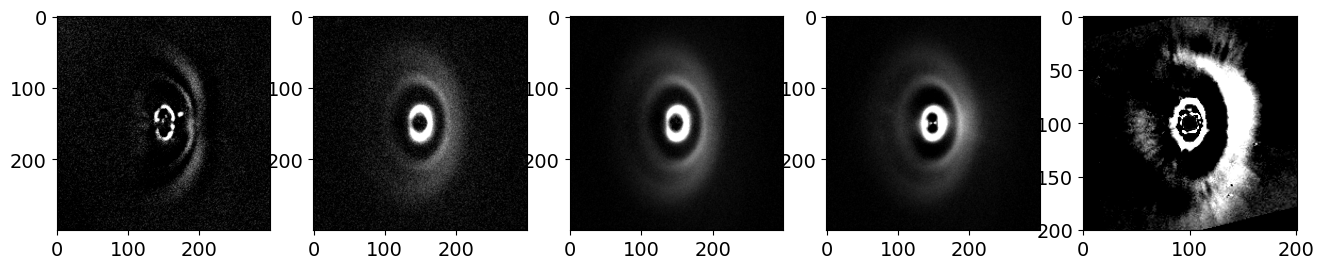

In [43]:
KADI = fits.open('fits/HagelslagTricolour/KBandADI.fits')[0].data
KADI = np.array(Cutout2D(KADI,(len(KADI[0])/2,len(KADI)/2),(300,300)).data)
KPDI = fits.open('fits/HagelslagTricolour/KBandPDI.fits')[0].data
KPDI = np.array(Cutout2D(KPDI,(len(KPDI[0])/2,len(KPDI)/2),(300,300)).data)
HPDI = fits.open('fits/HagelslagTricolour/HBandPDI.fits')[0].data
HPDI = np.array(Cutout2D(HPDI,(len(HPDI[0])/2,len(HPDI)/2),(300,300)).data)
HPDIS = fits.open('fits/HagelslagTricolour/HBandPDIStarPolSubtr.fits')[0].data
HPDIS = np.array(Cutout2D(HPDIS,(len(HPDIS[0])/2,len(HPDIS)/2),(300,300)).data)
HRDI = fits.open('fits/HagelslagTricolour/HBandRDI2023.fits')[0].data[49]
HRDI = np.array(Cutout2D(HRDI,(len(HRDI[0])/2,len(HRDI)/2),(300,300)).data)

fig, ax = plt.subplots(1,5,figsize=(16,9))
ax[0].imshow(KADI,cmap='gray',vmin=0,vmax=50)
ax[1].imshow(KPDI,cmap='gray',vmin=0,vmax=100)
ax[2].imshow(HPDI,cmap='gray',vmin=0,vmax=100)
ax[3].imshow(HPDIS,cmap='gray',vmin=0,vmax=100)
ax[4].imshow(HRDI,cmap='gray',vmin=0,vmax=100)

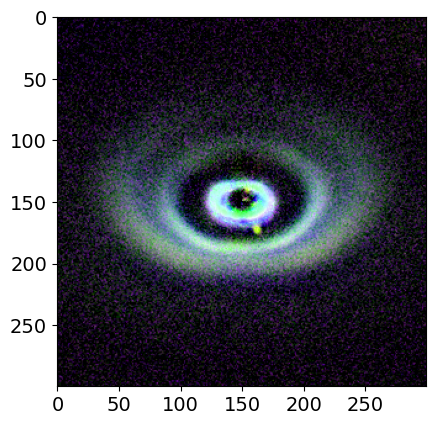

In [46]:
m=0.025

RGB = ndimage.rotate(visualization.make_lupton_rgb(image_r=(KADI+(2*KPDI))*m*0.9,
                                                   image_g=(HPDI+KADI*0.5)*m*2.25,
                                                   image_b=KPDI*m*2.5
                                                   ,
                                                   #stretch_object=visualization.LuptonAsinhStretch(
                                                   #    stretch=1,
                                                   #    Q=1
                                                   #),
                                                  stretch=2.5,
                                                  Q=2
                                                  ),-90)

plt.imshow(RGB,vmin=0)

<>:72: SyntaxWarning: invalid escape sequence '\D'
<>:73: SyntaxWarning: invalid escape sequence '\D'
<>:155: SyntaxWarning: invalid escape sequence '\D'
<>:72: SyntaxWarning: invalid escape sequence '\D'
<>:73: SyntaxWarning: invalid escape sequence '\D'
<>:155: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_39877/3299152429.py:72: SyntaxWarning: invalid escape sequence '\D'
  ax.set_xlabel('$\Delta$RA (arcsec)',color='black')
/tmp/ipykernel_39877/3299152429.py:73: SyntaxWarning: invalid escape sequence '\D'
  ax.set_ylabel('$\Delta$Dec (arcsec)',color='black')
/tmp/ipykernel_39877/3299152429.py:155: SyntaxWarning: invalid escape sequence '\D'
  ax1.set_xlabel('$\Delta$RA (arcsec)',color='black')


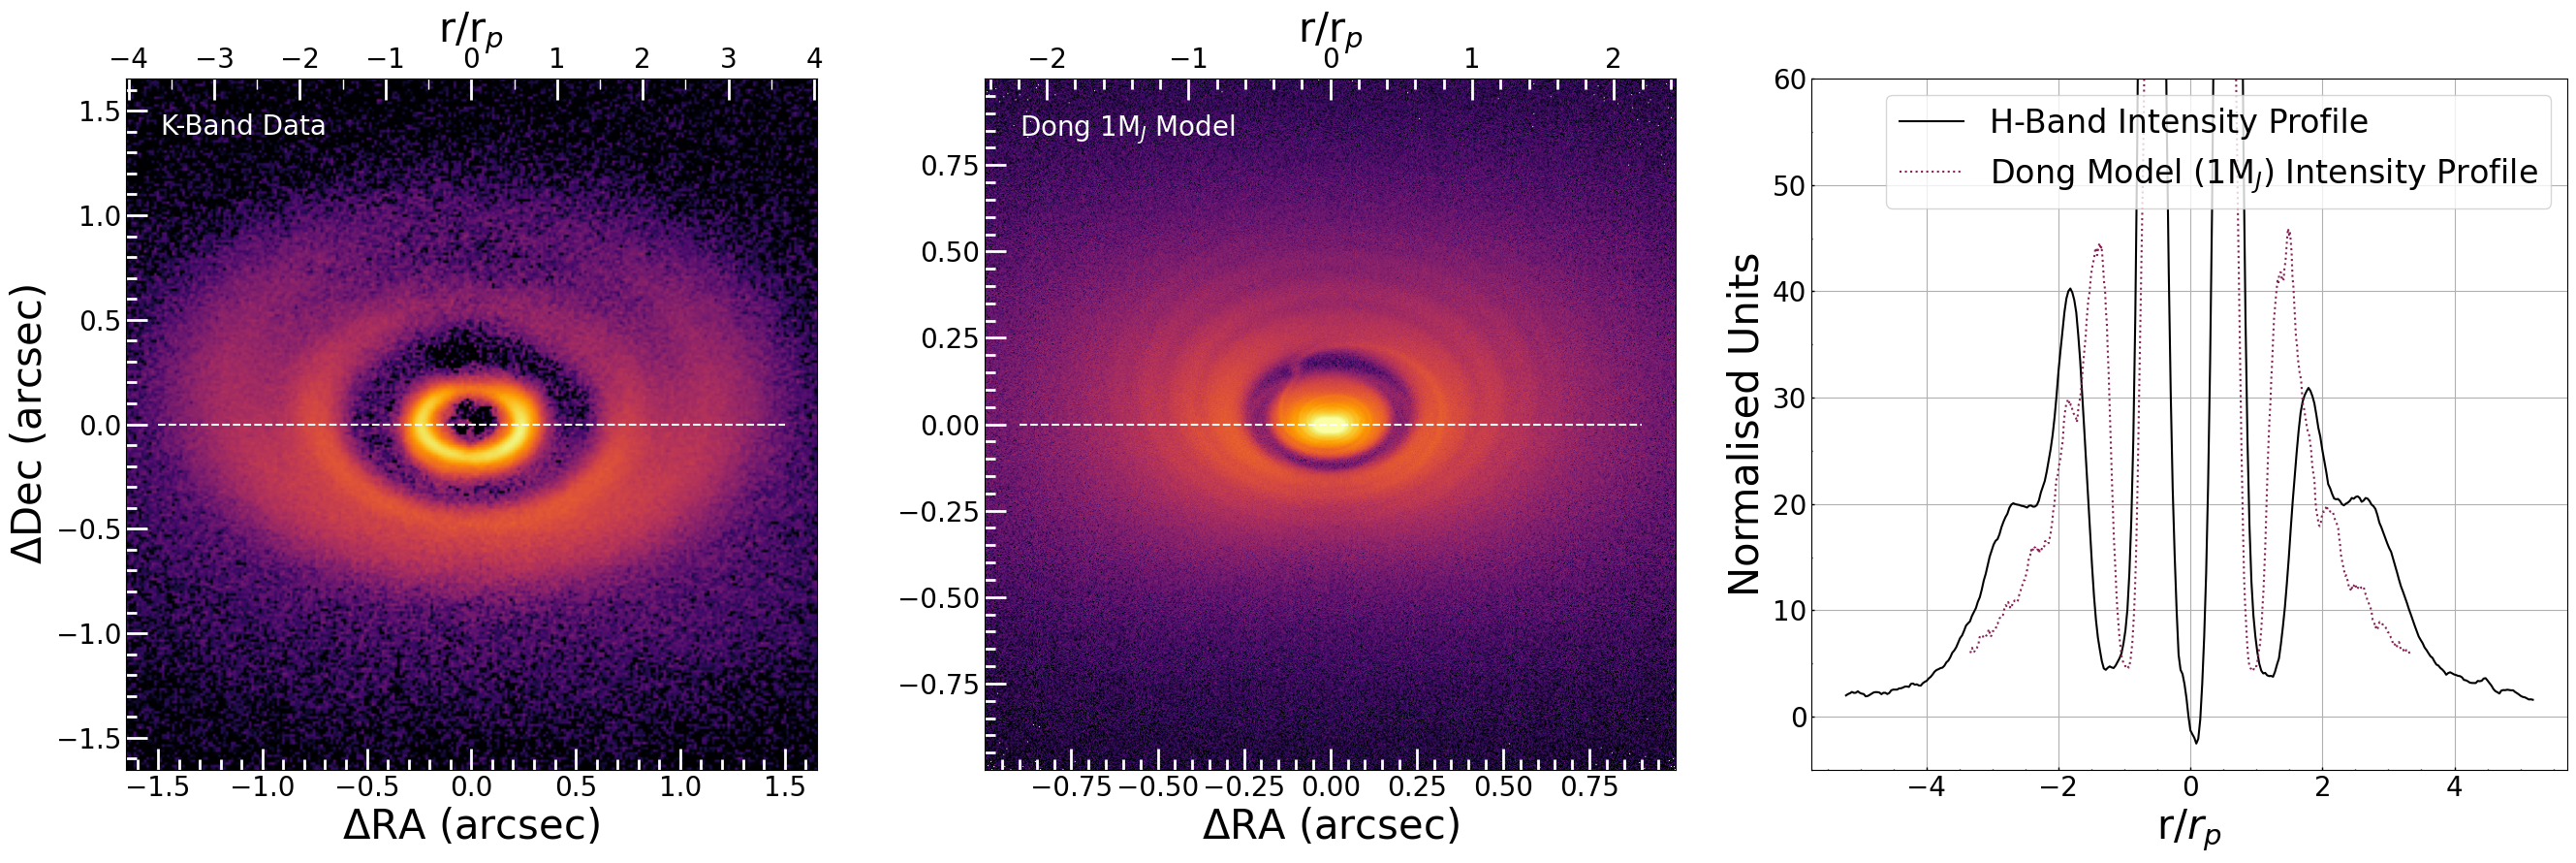

In [33]:
mpl.rcParams['axes.labelsize'] = 30      # x/y axis labels
mpl.rcParams['xtick.labelsize'] = 24      # x-tick labels
mpl.rcParams['ytick.labelsize'] = 24       # y-tick labels


DongModel = fits.open('fits/e_2H_45.0_0.0_PF_img.fits')[0].data

DongModel = np.array(Cutout2D(DongModel,(len(DongModel[0])/2,len(DongModel)/2),(700,700)).data)

TYC = fits.open('fits/TYC_5709-354-1_2025-03-21_Q_phi.fits')[0].data


TYC = np.array(Cutout2D(TYC,(len(TYC[0])/2,len(TYC)/2),(270,270)).data)



label_font_size=24

tick_font_size=20
ano_font_size=20
#fig, ax = plt.subplots(1,2,figsize=(16,9))
majorLocator   = MultipleLocator(0.5)
minorLocator   = MultipleLocator(0.1)    
    
fig = plt.figure(figsize=(27,9))

fig.subplots_adjust(hspace=0, wspace=0)   
    
ax = fig.add_subplot(131)        
ax.tick_params(axis='x', labelsize=tick_font_size)
ax.tick_params(axis='y', labelsize=tick_font_size)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_minor_locator(minorLocator)  
ax.yaxis.set_major_locator(majorLocator)
ax.yaxis.set_minor_locator(minorLocator)
ax.tick_params(axis='x', colors='white',direction="in")  
ax.tick_params(which="minor", axis='x', colors='white',direction="in")
ax.tick_params(which="minor", axis='y', colors='white',direction="in") 
ax.tick_params(axis='y', colors='white',direction="in") 
ax.xaxis.set_tick_params(width=2, length=16)
ax.xaxis.set_tick_params(which="minor", width=2, length=8)    
ax.yaxis.set_tick_params(which="minor", width=2, length=8)    
ax.yaxis.set_tick_params(width=2, length=16)

def rrptoarcsec(x):
    return 1/((1.642/0.012251)/55) * x
def arcsectorrp(x):
    return (1.642/0.012251)/55 * x


secax = ax.secondary_xaxis('top', functions=(arcsectorrp,rrptoarcsec))
secax.set_xlabel('r/r$_p$')
secax.xaxis.set_major_locator(MultipleLocator(1))
secax.xaxis.set_minor_locator(MultipleLocator(0.5))  
secax.tick_params(axis='x', colors='white',direction="in",labelsize=tick_font_size)  
secax.tick_params(which="minor", axis='x', colors='white',direction="in",labelsize=tick_font_size)

secax.xaxis.set_tick_params(width=2, length=16)
secax.xaxis.set_tick_params(which="minor", width=1, length=8)  

[t.set_color('white') for t in ax.xaxis.get_ticklines()]
[t.set_color('black') for t in ax.xaxis.get_ticklabels()]


[t.set_color('white') for t in ax.yaxis.get_ticklines()]
[t.set_color('black') for t in ax.yaxis.get_ticklabels()]

[t.set_color('white') for t in secax.xaxis.get_ticklines()]
[t.set_color('black') for t in secax.xaxis.get_ticklabels()]


ax.set_xlabel('$\Delta$RA (arcsec)',color='black')
ax.set_ylabel('$\Delta$Dec (arcsec)',color='black')
    
#ax.set_xlim([x_min,x_max])    
#ax.set_ylim([y_min,y_max])    
    
#ax7.axes.yaxis.set_ticklabels([])
#ax.axes.xaxis.set_ticklabels([])
ax.annotate("K-Band Data", (0.05, 0.95), xycoords="axes fraction", va="top", ha="left", fontsize=ano_font_size, color="white")
#ax2.yaxis.tick_right()      
#ax7.xaxis.tick_top() 

#ax.xaxis.label('$\Delta$RA (arcsec)')
ax.imshow(ndimage.rotate(TYC,90),cmap='inferno',origin='lower',
             norm=LogNorm(clip=True,vmin=1,vmax=600),extent=[-0.012251*len(TYC)/2,
                                                             0.012251*len(TYC)/2,
                                                            -0.012251*len(TYC)/2,
                                                             0.012251*len(TYC)/2]
            )

ax.plot(np.linspace(-1.5,1.5),np.zeros(50),color='white',linestyle='dashed')




#fig, ax = plt.subplots(1,2,figsize=(16,9))
majorLocator   = MultipleLocator(0.25)
minorLocator   = MultipleLocator(0.05)    
    
 
    
ax1 = fig.add_subplot(132)   



ax1.tick_params(axis='x', labelsize=tick_font_size)
ax1.tick_params(axis='y', labelsize=tick_font_size)
ax1.xaxis.set_major_locator(majorLocator)
ax1.xaxis.set_minor_locator(minorLocator)  
ax1.yaxis.set_major_locator(majorLocator)
ax1.yaxis.set_minor_locator(minorLocator)
ax1.tick_params(axis='x', colors='white',direction="in")  
ax1.tick_params(which="minor", axis='x', colors='white',direction="in")
ax1.tick_params(which="minor", axis='y', colors='white',direction="in") 
ax1.tick_params(axis='y', colors='white',direction="in") 
ax1.xaxis.set_tick_params(width=2, length=16)
ax1.xaxis.set_tick_params(which="minor", width=2, length=8)    
ax1.yaxis.set_tick_params(which="minor", width=2, length=8)    
ax1.yaxis.set_tick_params(width=2, length=16)


def rrptoarcsec(x):
    return 1/((1.642/0.012251)/55) * x
def arcsectorrp(x):
    return (1.642/0.012251)/55 * x


secax1 = ax1.secondary_xaxis('top', functions=(arcsectorrp,rrptoarcsec))
secax1.set_xlabel('r/r$_p$')
secax1.xaxis.set_major_locator(MultipleLocator(1))
secax1.xaxis.set_minor_locator(MultipleLocator(0.2))  
secax1.tick_params(axis='x', colors='white',direction="in",labelsize=tick_font_size)  
secax1.tick_params(which="minor", axis='x', colors='white',direction="in",labelsize=tick_font_size)

secax1.xaxis.set_tick_params(width=2, length=16)
secax1.xaxis.set_tick_params(which="minor", width=2, length=8)    

#ax1.set_xlabel('$\Delta$RA (arcsec)')
#ax1.set_ylabel('$\Delta$Dec (arcsec)')
    
#ax.set_xlim([x_min,x_max])    
#ax.set_ylim([y_min,y_max])    

[t.set_color('white') for t in ax1.xaxis.get_ticklines()]
[t.set_color('black') for t in ax1.xaxis.get_ticklabels()]


[t.set_color('white') for t in ax1.yaxis.get_ticklines()]
[t.set_color('black') for t in ax1.yaxis.get_ticklabels()]

[t.set_color('white') for t in secax1.xaxis.get_ticklines()]
[t.set_color('black') for t in secax1.xaxis.get_ticklabels()]

ax1.set_xlabel('$\Delta$RA (arcsec)',color='black')
    
#ax7.axes.yaxis.set_ticklabels([])
#ax1.axes.xaxis.set_ticklabels([])
ax1.annotate("Dong 1M$_J$ Model", (0.05, 0.95), xycoords="axes fraction", va="top", ha="left", fontsize=ano_font_size, color="white")
#ax2.yaxis.tick_right()      
#ax7.xaxis.tick_top() 



ax1.imshow(DongModel,origin='lower',cmap='inferno',#vmin=0,
             #vmax=500,
             norm=LogNorm(vmin=1,vmax=10000),extent=[-0.002857*len(DongModel)/2,
                                                             0.002857*len(DongModel)/2,
                                                            -0.002857*len(DongModel)/2,
                                                             0.002857*len(DongModel)/2])

ax1.plot(np.linspace(-0.9,0.9),np.zeros(50),color='white',linestyle='dashed')



#fig, ax = plt.subplots(1,2,figsize=(16,9))
majorLocator   = MultipleLocator(2)
minorLocator   = MultipleLocator(0.5)    
    
 
    
ax2 = fig.add_subplot(133)        
ax2.tick_params(axis='x', labelsize=tick_font_size)
ax2.tick_params(axis='y', labelsize=tick_font_size)
ax2.xaxis.set_major_locator(majorLocator)
ax2.xaxis.set_minor_locator(minorLocator)  
ax2.yaxis.set_major_locator(MultipleLocator(10))
ax2.yaxis.set_minor_locator(MultipleLocator(5))
ax2.tick_params(axis='x', colors='black',direction="in")  
ax2.tick_params(which="minor", axis='x', colors='black',direction="in")
ax2.tick_params(which="minor", axis='y', colors='black',direction="in") 
ax2.tick_params(axis='y', colors='black',direction="in") 
ax2.xaxis.set_tick_params(width=1, length=2)
ax2.xaxis.set_tick_params(which="minor", width=1, length=1)    
ax2.yaxis.set_tick_params(which="minor", width=1, length=1)    
ax2.yaxis.set_tick_params(width=1, length=2)
ax2.set_xlabel('r/$r_p$')
ax2.set_ylabel('Normalised Units')

ax2.grid()
[t.set_color('black') for t in ax2.xaxis.get_ticklines()]
[t.set_color('black') for t in ax2.xaxis.get_ticklabels()]


[t.set_color('black') for t in ax2.yaxis.get_ticklines()]
[t.set_color('black') for t in ax2.yaxis.get_ticklabels()]



#ax2.set_xlim([x_min,x_max])    
ax2.set_ylim([-5,60])    
    
#ax7.axes.yaxis.set_ticklabels([])
#ax2.axes.xaxis.set_ticklabels([])
#ax2.annotate("Dong 1M$_J$ Model", (0.05, 0.95), xycoords="axes fraction", va="top", ha="left", fontsize=ano_font_size, color="white")
#ax2.yaxis.tick_right()      
#ax7.xaxis.tick_top() 

ax2.plot(index,fluxes,color='black')
ax2.plot(mindex,mfluxes,color='#882255',linestyle='dotted')
ax2.legend(['H-Band Intensity Profile','Dong Model (1M$_J$) Intensity Profile'],fontsize=label_font_size)


fig.tight_layout()
#plt.ylim(-5,60)
#plt.xlim(0,5)

#ax2.ylim(-5,60)
#plt.xlim(0,5)


plt.savefig('WISPITData-Model-Comparison.pdf')


Ring/Gap Mean Contrast:  [3.81265356]
(500, 500)


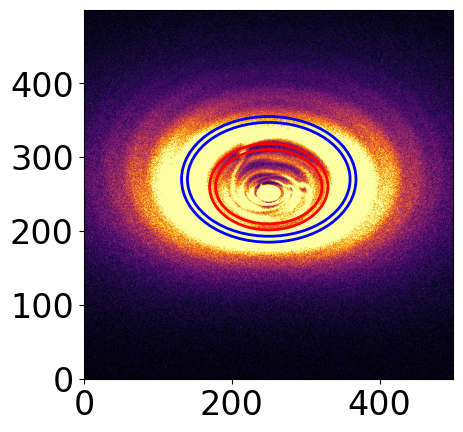

In [34]:
DongModel = fits.open('fits/e_2H_45.0_0.0_PF_img(0.4auperpixel).fits')[0].data


DongModel = np.array(Cutout2D(DongModel,(len(DongModel[0])/2,len(DongModel)/2),(500,500)).data)

plt.imshow(DongModel,origin='lower',cmap='inferno',vmax=200#extent=[-3,3,-3,3],
          )

positions = [(250, 260)]
m=72
ap1 = aperture.EllipticalAnnulus(positions, a_in=1*m,b_in=0.7*m,a_out=1*m+8,b_out=0.7*m+8)
positions = [(250, 270)]
m=110
ap2 = aperture.EllipticalAnnulus(positions, a_in=1*m,b_in=0.7*m,a_out=1*m+8,b_out=0.7*m+8)
print('Ring/Gap Mean Contrast: ',aperture.ApertureStats(DongModel, ap2).mean/aperture.ApertureStats(DongModel, ap1).mean)
#ap = aperture.CircularAperture(positions,r=4)

ap_patches = ap1.plot(color='red', lw=2,
                           label='Photometry aperture')
ap_patches = ap2.plot(color='blue', lw=2,
                           label='Photometry aperture')
print(DongModel.shape)

100%|███████████████████████████████████████| 500/500 [00:00<00:00, 1906.21it/s]


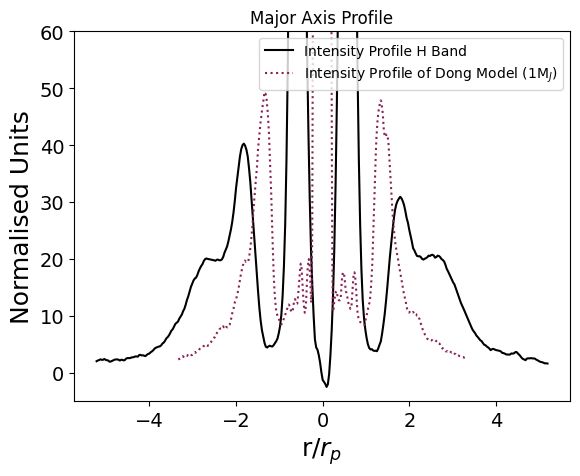

In [41]:



import matplotlib as mpl
mpl.rcParams['axes.labelsize'] = 18       # x/y axis labels
mpl.rcParams['xtick.labelsize'] = 14      # x-tick labels
mpl.rcParams['ytick.labelsize'] = 14 

positions = [(170, 175)]
fluxes = []
index = []
for m in tqdm(range(-175,175)):
    ap = aperture.CircularAperture(r=4,positions=(175,175+m))
    
    Flux = aperture.ApertureStats(TYC, ap).mean

    rm=160
    refap = aperture.EllipticalAnnulus(positions, a_in=1*rm,b_in=0.7*rm,a_out=1*rm+1,b_out=0.7*rm+1,theta=90*np.pi/180)
    #refFlux = aperture.ApertureStats(TYC, refap).sum
    
    index.append((1.64*m)/55)
    fluxes.append(Flux#/refFlux
                 )

mpositions = [(250, 260)]
mfluxes = []
mindex = []
for m in tqdm(range(-250,250)):
    ap = aperture.CircularAperture(r=4,positions=(250+m,250))
    
    Flux = aperture.ApertureStats(DongModel, ap).mean

    rm=240
    refap = aperture.EllipticalAnnulus(positions, a_in=1*rm,b_in=0.7*rm,a_out=1*rm+1,b_out=0.7*rm+1)
    #refFlux = aperture.ApertureStats(DongModel, refap).sum
    
    mindex.append((0.4*m)/30)
    mfluxes.append(Flux/18#/refFlux
                      )

plt.plot(index,fluxes,color='black')
plt.plot(mindex,mfluxes,color='#882255',linestyle='dotted')
plt.ylim(-5,60)
#plt.xlim(0,5)
plt.xlabel('r/$r_p$')
plt.ylabel('Normalised Units')
plt.legend(['Intensity Profile H Band','Intensity Profile of Dong Model (1M$_J$)'])
plt.title('Major Axis Profile')
plt.savefig('MajorAxis.pdf')